<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Asset_Management_Analytics_in_the_Finance_Sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib scipy


Expected Portfolio Return: 261.74%
Portfolio Risk (Standard Deviation): 15.65%


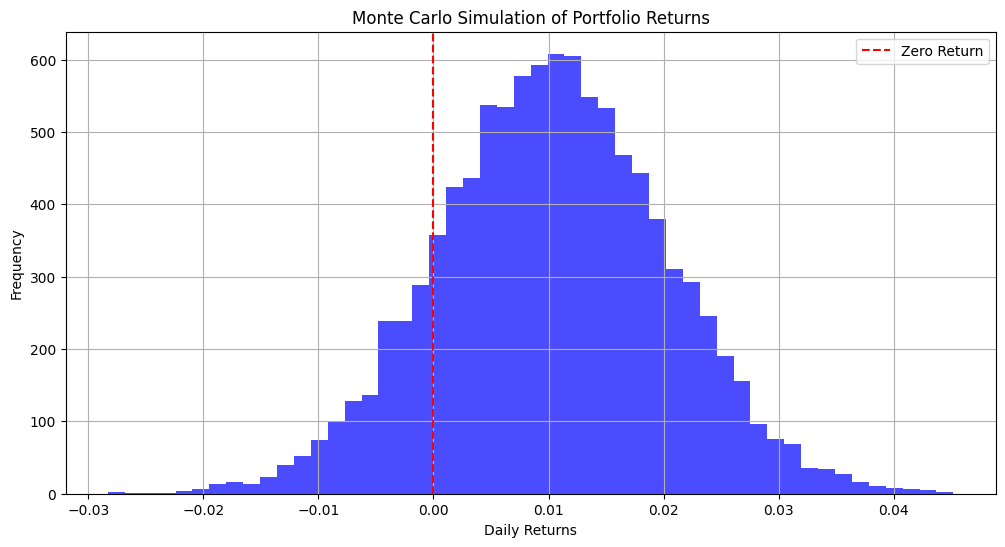

Value at Risk (VaR) at 95% confidence level: -0.60%


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Simulating a portfolio of 4 assets
np.random.seed(42)  # For reproducibility
assets = ['Asset A', 'Asset B', 'Asset C', 'Asset D']
returns = np.random.normal(loc=0.01, scale=0.02, size=(1000, len(assets)))  # Simulated daily returns

# Creating a DataFrame for the simulated returns
returns_df = pd.DataFrame(returns, columns=assets)

# Calculating expected returns and covariance matrix
expected_returns = returns_df.mean() * 252  # Annualized expected returns
cov_matrix = returns_df.cov() * 252  # Annualized covariance matrix

# Portfolio weights (example: equal allocation)
weights = np.array([0.25, 0.25, 0.25, 0.25])

# Portfolio expected return and risk
portfolio_return = np.dot(weights, expected_returns)
portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

print(f"Expected Portfolio Return: {portfolio_return:.2%}")
print(f"Portfolio Risk (Standard Deviation): {portfolio_std_dev:.2%}")

# Monte Carlo Simulation for portfolio returns
num_simulations = 10000
simulated_returns = np.random.normal(portfolio_return / 252, portfolio_std_dev / np.sqrt(252), num_simulations)

# Plotting the simulation results
plt.figure(figsize=(12, 6))
plt.hist(simulated_returns, bins=50, color='blue', alpha=0.7)
plt.title('Monte Carlo Simulation of Portfolio Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Return')
plt.legend()
plt.grid()
plt.show()

# Calculating Value at Risk (VaR) at 95% confidence level
VaR_95 = np.percentile(simulated_returns, 5)
print(f"Value at Risk (VaR) at 95% confidence level: {VaR_95:.2%}")
